## Imports and GX Context

In [6]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.view as gxview
import geosoft.gxpy.group as gxgroup
import geosoft.gxpy.agg as gxagg
import geosoft.gxpy.grid as gxgrd
import geosoft.gxpy.viewer as gxviewer
import geosoft.gxpy.utility as gxu
import geosoft.gxpy.map as gxmap
from IPython.display import Image

gxc = gx.GXpy()

## Get the Working Data from GitHub

In [2]:
url = 'https://github.com/GeosoftInc/gxpy/raw/9.3/examples/tutorial/3D%20Views/'
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd')
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd.gi')
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd.xml')
gxu.url_retrieve(url + 'Wittichica DEM.grd')
gxu.url_retrieve(url + 'Wittichica DEM.grd.gi')
gxu.url_retrieve(url + 'Wittichica DEM.grd.xml')

tmi_file = 'Wittichica Creek Residual Total Field.grd'
dem_file = 'Wittichica DEM.grd'

## Create a 3D view with 3 planes

In [3]:
with gxview.View_3d.new("TMI drapped on DEM",
                        area_2d=gxgrd.Grid.open(tmi_file).extent_2d(),
                        coordinate_system=gxgrd.Grid.open(tmi_file).coordinate_system,
                        scale=5000,
                        overwrite=True) as v:

    v3d_name = v.file_name

    # use the DEM as the relief surface
    v.set_plane_relief_surface(dem_file)
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(dem_file,
                                                             color_map='elevation.tbl'))

    # relief plane for the TMI, offset to elevation 2000
    v.new_drawing_plane('TMI relief')
    v.set_plane_relief_surface(tmi_file, base=-4000)
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(tmi_file))
    gxgroup.contour(v, 'TMI_contour', tmi_file)

    # add DEM contours on a plane floating beneath the DEM
    v.new_drawing_plane('Scratch plane', offset=(0, 0, -2000))
    gxgroup.contour(v, 'DEM contour', tmi_file)

## Make a PNG and Display as an Image, and in the Geosoft Viewer

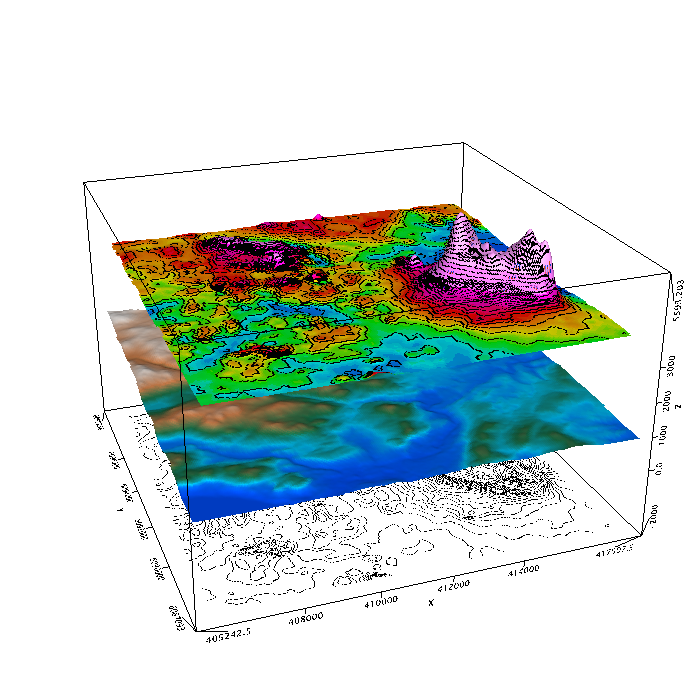

In [16]:
# create a PNG before opening the file as once open it will be locked
png_file = '3d_stack.png'
gxmap.save_as_image(v3d_name, png_file, pix_width=700)

# open in the Geosoft viewer
gxviewer.view_document(v3d_name, wait_for_close=False)

# show the image here
Image(png_file)